# Spotify music recommendation
* https://dev.to/mxdws/using-python-with-the-spotify-api-1d02
* https://medium.com/analytics-vidhya/build-your-own-playlist-generator-with-spotifys-api-in-python-ceb883938ce4
* https://towardsdatascience.com/get-your-spotify-streaming-history-with-python-d5a208bbcbd3
* https://medium.com/python-in-plain-english/music-recommendation-system-for-djs-d253d472677e
* https://github.com/tgel0/spotify-data
* https://towardsdatascience.com/a-visual-look-at-my-taste-in-music-a8c197a728be
* https://towardsdatascience.com/how-to-utilize-spotifys-api-and-create-a-user-interface-in-streamlit-5d8820db95d5
* https://medium.com/deep-learning-turkey/build-your-own-spotify-playlist-of-best-playlist-recommendations-fc9ebe92826a

Before diving in, let's play some music:

[Lucy in the Sky with Diamonds](https://open.spotify.com/track/25yQPHgC35WNnnOUqFhgVR)

In [ ]:
lucy_id = "25yQPHgC35WNnnOUqFhgVR"
url = "https://open.spotify.com/track/"+lucy_id
import webbrowser
webbrowser.open(url)

## Spotipy

https://spotipy.readthedocs.io/


In [1]:
from secret import *
os.environ["SPOTIPY_CLIENT_ID"] = clientId
os.environ["SPOTIPY_CLIENT_SECRET"] = clientSecret
os.environ["SPOTIPY_REDIRECT_URI"] = "https://open.spotify.com/"

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials()

In [3]:
sp = spotipy.Spotify(auth_manager = auth_manager)

### Search track

In [4]:
results = sp.search(q='track:'+'Lucy in the Sky',type='track')
items = results['tracks']['items']
if len(items) > 0:
    # tracks = items[0]
    for tracks in items:
        print(tracks['name'])

Lucy In The Sky With Diamonds - Remastered 2009
Lucy In The Sky With Diamonds
Lucy In The Sky With Diamonds
Lucy In The Sky With Diamonds - Remix
Lucy In The Sky With Diamonds - Remix
Lucy In The Sky With Diamonds
Lucy In The Sky With Diamonds
Lucy In The Sky With Diamonds - Remastered 2009
Lucy in the Sky with Diamonds - Sleep Version
Lucy in the Sky With Diamonds


In [10]:
track_name = results['tracks']['items'][0]['name']
track_name

'Lucy In The Sky With Diamonds - Remastered 2009'

In [13]:
track_id = results['tracks']['items'][0]['id']
track_id

'25yQPHgC35WNnnOUqFhgVR'

In [58]:
track_artist = results['tracks']['items'][0]['artists'][0]['name']
track_artist

'The Beatles'

In [59]:
track_artist_id = results['tracks']['items'][0]['artists'][0]['id']
track_artist_id

'3WrFJ7ztbogyGnTHbHJFl2'

In [24]:
track_album = results['tracks']['items'][0]['album']['name']
track_album

"Sgt. Pepper's Lonely Hearts Club Band (Remastered)"

In [49]:
track_album_id = results['tracks']['items'][0]['album']['id']
track_album_id

'6QaVfG1pHYl1z15ZxkvVDW'

In [29]:
img_album = results['tracks']['items'][0]['album']['images'][1]['url']
import requests
r = requests.get(img_album)
open('img/'+track_id+'.jpg', 'wb').write(r.content)

67663

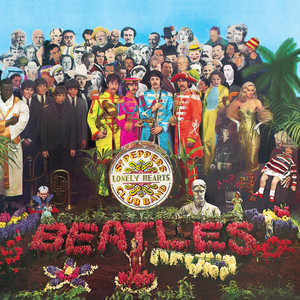

In [30]:
from IPython.display import Image
Image(filename='img/'+track_id+'.jpg') 

### Get Track by id

![track dict](track.png)

In [43]:
# Lucy in the Sky with Diamonds
lucy_id = '25yQPHgC35WNnnOUqFhgVR'
track = sp.track(lucy_id) 
# track
print(track['name']+' - '+track['album']['name'])

Lucy In The Sky With Diamonds - Remastered 2009 - Sgt. Pepper's Lonely Hearts Club Band (Remastered)


### Get Features

In [32]:
track_features = sp.audio_features(lucy_id)
track_features

[{'danceability': 0.311,
  'energy': 0.325,
  'key': 2,
  'loudness': -9.042,
  'mode': 1,
  'speechiness': 0.0283,
  'acousticness': 0.0469,
  'instrumentalness': 0,
  'liveness': 0.139,
  'valence': 0.668,
  'tempo': 65.09,
  'type': 'audio_features',
  'id': '25yQPHgC35WNnnOUqFhgVR',
  'uri': 'spotify:track:25yQPHgC35WNnnOUqFhgVR',
  'track_href': 'https://api.spotify.com/v1/tracks/25yQPHgC35WNnnOUqFhgVR',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/25yQPHgC35WNnnOUqFhgVR',
  'duration_ms': 208467,
  'time_signature': 1}]

In [34]:
import pandas as pd
# df_features = spotifyAPI.parse_features(track_features)
df = pd.DataFrame(track_features, index=[0])
df_features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
df_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.0469,0.311,0.325,0,0.139,0.0283,0.668


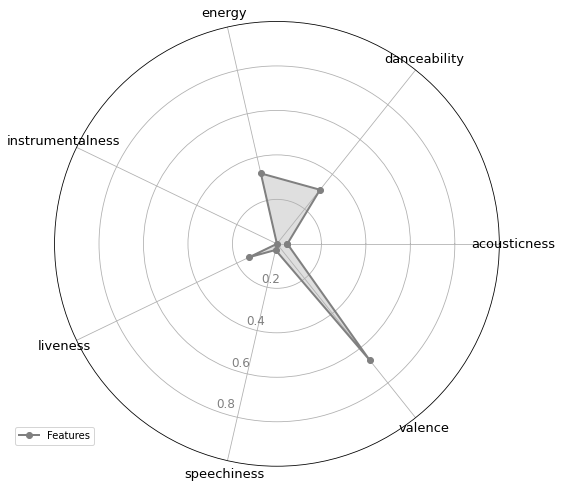

In [35]:
import spotifyAPI
spotifyAPI.feature_plot(df_features)

### Get recommendations 

In [63]:
token  = spotifyAPI.get_token(clientId,clientSecret)
json_response = spotifyAPI.get_track_reco(lucy_id,token)
uris =[]
for i in json_response['tracks']:
            uris.append(i)
            print(f"\"{i['name']}\" by {i['artists'][0]['name']}")

"Band On The Run - Remastered 2010" by Wings
"Freaking Out The Neighborhood" by Mac DeMarco
"Roundabout - 2003 Remaster" by Yes
"Dark Star - Single Version; 2001 Remaster" by Grateful Dead
"Epitaph" by King Crimson
"Across The Universe - Remastered 2009" by The Beatles
"Walk On the Wild Side" by Lou Reed
"Work This Time" by King Gizzard & The Lizard Wizard
"Season of the Witch" by Donovan
"Oh! Sweet Nuthin' - 2015 Remaster" by The Velvet Underground


In [69]:
recolist = json_response['tracks']

In [79]:
recolist[0]['id']

'1H4idkmruFoJBg1DvUv2tY'

In [86]:
recolist[1]['id']

'0MgOsVty0YR1kas7x16yoS'

In [80]:
recolist[0]['album']['images'][2]['url']

'https://i.scdn.co/image/ab67616d000048513bfeed5916a64f63b4e25ce2'

In [85]:
recolist[1]['album']['images'][2]['url']

'https://i.scdn.co/image/ab67616d00004851681384864fcbda288ed7d365'

In [71]:
reco = pd.DataFrame(recolist)
reco

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",1,313026,False,{'isrc': 'GBCCS1000004'},{'spotify': 'https://open.spotify.com/track/1H...,https://api.spotify.com/v1/tracks/1H4idkmruFoJ...,1H4idkmruFoJBg1DvUv2tY,False,Band On The Run - Remastered 2010,71,None,1,track,spotify:track:1H4idkmruFoJBg1DvUv2tY
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AU, NZ]",1,173866,False,{'isrc': 'QMMZN1200048'},{'spotify': 'https://open.spotify.com/track/0M...,https://api.spotify.com/v1/tracks/0MgOsVty0YR1...,0MgOsVty0YR1kas7x16yoS,False,Freaking Out The Neighborhood,53,None,3,track,spotify:track:0MgOsVty0YR1kas7x16yoS
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",1,510573,False,{'isrc': 'USEE10251885'},{'spotify': 'https://open.spotify.com/track/0Y...,https://api.spotify.com/v1/tracks/0YveezON7jpi...,0YveezON7jpiaHA8fnUHxN,False,Roundabout - 2003 Remaster,66,https://p.scdn.co/mp3-preview/0f40c0588a695394...,1,track,spotify:track:0YveezON7jpiaHA8fnUHxN
3,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",1,163280,False,{'isrc': 'USWB10105574'},{'spotify': 'https://open.spotify.com/track/0B...,https://api.spotify.com/v1/tracks/0BBcbPbTWW8M...,0BBcbPbTWW8MaLKIDHtsAi,False,Dark Star - Single Version; 2001 Remaster,37,https://p.scdn.co/mp3-preview/7ad922d06f309c6b...,27,track,spotify:track:0BBcbPbTWW8MaLKIDHtsAi
4,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",1,526822,False,{'isrc': 'GBCTX1400802'},{'spotify': 'https://open.spotify.com/track/4r...,https://api.spotify.com/v1/tracks/4rEle6gif1VE...,4rEle6gif1VERA41tjOTIq,False,Epitaph,55,https://p.scdn.co/mp3-preview/c8072528397b840b...,3,track,spotify:track:4rEle6gif1VERA41tjOTIq
5,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",1,228133,False,{'isrc': 'GBAYE0601710'},{'spotify': 'https://open.spotify.com/track/4d...,https://api.spotify.com/v1/tracks/4dkoqJrP0L8F...,4dkoqJrP0L8FXftrMZongF,False,Across The Universe - Remastered 2009,66,None,3,track,spotify:track:4dkoqJrP0L8FXftrMZongF
6,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",1,254173,False,{'isrc': 'USRC17201948'},{'spotify': 'https://open.spotify.com/track/5p...,https://api.spotify.com/v1/tracks/5p3JunprHCxC...,5p3JunprHCxClJjOmcLV8G,False,Walk On the Wild Side,75,https://p.scdn.co/mp3-preview/ba3b4fe65d519880...,5,track,spotify:track:5p3JunprHCxClJjOmcLV8G
7,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",1,276893,False,{'isrc': 'AUDJ01401042'},{'spotify': 'https://open.spotify.com/track/3V...,https://api.spotify.com/v1/tracks/3VDRXEOQDjBs...,3VDRXEOQDjBsQyzbFs1qGa,False,Work This Time,62,https://p.scdn.co/mp3-preview/b425f3a2e88589ce...,5,track,spotify:track:3VDRXEOQDjBsQyzbFs1qGa
8,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",1,293933,False,{'isrc': 'USSM19916827'},{'spotify': 'https://open.spotify.com/track/6M...,https://api.spotify.com/v1/tracks/6MOEQCtAWNSC...,6MOEQCtAWNSCmvg3SFKF5y,False,Season of the Witch,64,https://p.scdn.co/mp3-preview/887238407ba19a3b...,6,track,spotify:t

### Artist albums

In [11]:
import pandas as pd
artists = pd.read_csv('spotify-artist-uris.csv', header=None, index_col=0, squeeze=True).to_dict()

In [12]:
mj_uri = artists['Michael Jackson']

results = sp.artist_albums(mj_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Scream
XSCAPE
XSCAPE - Track by Track Commentary
Michael
Invincible
BLOOD ON THE DANCE FLOOR/ HIStory In The Mix
BLOOD ON THE DANCE FLOOR/ HIStory In The Mix
Manila 1996
HIStory - PAST, PRESENT AND FUTURE - BOOK I
HIStory - PAST, PRESENT AND FUTURE - BOOK I
Dangerous
Bad (Remastered)
Bad 25th Anniversary
Thriller
Thriller
Thriller 25 Super Deluxe Edition
Off the Wall
Forever Michael
Forever, Michael
Music And Me
Music & Me
Music and Me
Ben
Ben
Got To Be There
Got To Be There


In [ ]:
url = "https://open.spotify.com/artist/"+mj_uri.replace('spotify:artist:','')
import webbrowser
webbrowser.open(url)

### Artist top tracks

In [13]:
import ipywidgets as widgets
artist = widgets.Text(value='Led Zeppelin')
artist

Text(value='Led Zeppelin')

In [14]:
# how to get 30 second samples and cover art for the top 10 tracks for Led Zeppelin:
lz_uri = artists[artist.value]

results = sp.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/8226164717312bc411f8635580562d67e191a754?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/ce11b19a4d2de9976d7626df0717d0073863909c?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/8455599677a13017978dcd3f4b210937f0a16bcb?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b27390a50cfe99a4c19ff3cbfbdb

track    : Black Dog - Remaster
audio    : https://p.scdn.co/mp3-preview/9b76619fd9d563a48d38cc90ca00c3008327b52e?cid=5430345c1c6e472fae6e3fb2c1399bce
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Ramble On - 1990 Remaster
audio    : https://p.scdn

### [Advanced Search](https://spotipy.readthedocs.io/en/2.16.1/#spotipy.client.Spotify.search)

_search(q, limit=10, offset=0, type='track', market=None)_

**Parameters**:
* q - the search query (see how to write a query in the
official documentation https://developer.spotify.com/documentation/web-api/reference/search/search/) # noqa
* limit - the number of items to return (min = 1, default = 10, max = 50)
* offset - the index of the first item to return
* type - the type of item to return. One of ‘artist’, ‘album’,
‘track’, ‘playlist’, ‘show’, or ‘episode’
* market - An ISO 3166-1 alpha-2 country code or the string
from_token.

https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b

The following code collects 1,000 Track IDs and their associated track name, artist name, and popularity score.
(it does not require a Spotify ID)

In [ ]:
artist_name = []
track_name = []
popularity = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])

### Current user

In [11]:
username = '1146603936'
user = sp.user(user = username)
user

{'display_name': 'Yann Debray',
 'external_urls': {'spotify': 'https://open.spotify.com/user/1146603936'},
 'followers': {'href': None, 'total': 4},
 'href': 'https://api.spotify.com/v1/users/1146603936',
 'id': '1146603936',
 'images': [{'height': None,
   'url': 'https://scontent-lga3-2.xx.fbcdn.net/v/t1.0-1/c0.0.320.320a/p320x320/67559378_10158614358493056_9107852822640066560_o.jpg?_nc_cat=105&ccb=2&_nc_sid=0c64ff&_nc_ohc=IducDHpl18UAX854xHy&_nc_ht=scontent-lga3-2.xx&tp=27&oh=94dfc9880f69491cc7721edebb310bcb&oe=5FC41959',
   'width': None}],
 'type': 'user',
 'uri': 'spotify:user:1146603936'}

In [20]:
url = user['images'][0]['url']

In [26]:
import requests

r = requests.get(url)
r.content

open('facebook.jpg', 'wb').write(r.content)

18541

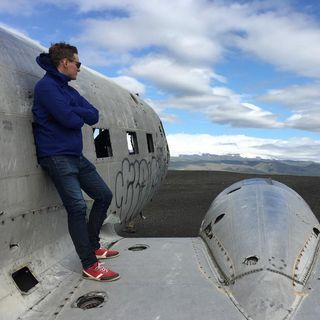

In [27]:
from IPython.display import Image
Image(filename='facebook.jpg') 

## Access Scopes

* Images
  * [ugc-image-upload](https://developer.spotify.com/documentation/general/guides/scopes/#ugc-image-upload)
* Spotify Connect
  * [user-read-playback-state](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-playback-state)
  * [user-modify-playback-state](https://developer.spotify.com/documentation/general/guides/scopes/#user-modify-playback-state)
  * [user-read-currently-playing](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-currently-playing)
* Playback
  * [streaming](https://developer.spotify.com/documentation/general/guides/scopes/#streaming)
  * [app-remote-control](https://developer.spotify.com/documentation/general/guides/scopes/#app-remote-control)
* Users
  * [user-read-email](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-email)
  * [user-read-private](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-private)
* Playlists
  * [playlist-read-collaborative](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-read-collaborative)
  * [playlist-modify-public](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-modify-public)
  * [playlist-read-private](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-read-private)
  * [playlist-modify-private](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-modify-private)
* Library
  * [user-library-modify](https://developer.spotify.com/documentation/general/guides/scopes/#user-library-modify)
  * [user-library-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-library-read)
* Listening History
  * [user-top-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-top-read)
  * [user-read-playback-position](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-playback-position)
  * [user-read-recently-played](https://developer.spotify.com/documentation/general/guides/scopes/#user-read-recently-played)
* Follow
  * [user-follow-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-follow-read)
  * [user-follow-modify](https://developer.spotify.com/documentation/general/guides/scopes/#user-follow-modify)

### Saved Tracks

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-library-read"

auth_user = SpotifyOAuth(scope=scope, username=username)
auth_user.get_cached_token()

In [32]:
from spotipy import util
token = util.prompt_for_user_token(username=username)

In [9]:
sp = spotipy.Spotify(auth_manager=auth_user)

results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 King Princess  –  Only Time Makes It Human
1 Zak Manley  –  Kiss Me
2 A R I Z O N A  –  I Was Wrong - Acoustic
3 Joni Mitchell  –  River
4 The Script  –  The Last Time - Acoustic
5 Highland Peak  –  Lose You To Love Me - Acoustic
6 Ben Woodward  –  Memories (Acoustic)
7 Maisie Peters  –  Maybe Don't (feat. JP Saxe)
8 Emily Hall  –  Stupid Love - Acoustic Cover
9 Landon Austin  –  Never Let You Go - Acoustic
10 Anne-Marie  –  Birthday - Acoustic
11 Sara Farell  –  Beautiful People
12 Taylor Manns  –  Always On My Mind
13 Poo Bear  –  Two Commas
14 Lennon Stella  –  Kissing Other People - Acoustic
15 Joshua Radin  –  America
16 James Morrison  –  You Give Me Something - (Live fromTokyo)
17 Foo Fighters  –  Best Of You - Live at the Pantages Theatre, Los Angeles, CA - August 2006
18 RAYE  –  Natalie Don't
19 Radiohead  –  Karma Police


### Saved Albums
https://developer.spotify.com/console/get-current-user-saved-albums

In [28]:
results = sp.current_user_saved_albums(limit=20)
# results
# results['items'][0]
for idx, item in enumerate(results['items']):
    album = item['album']
    print(idx, album['artists'][0]['name'])

0 Joshua Radin
1 Lady Gaga
2 Meghan Trainor
3 Maroon 5
4 David Bowie


### Playlist
https://developer.spotify.com/console/get-current-user-playlists/

In [29]:
scope = "playlist-read-private"

auth_user = SpotifyOAuth(scope=scope, username=username)
sp = spotipy.Spotify(auth_manager=auth_user)

results = sp.current_user_playlists(limit=50)
results['items'][0]
for idx, item in enumerate(results['items']):
    print(idx, item['name'], " – public: ", item['public'])

0 Laidback Acoustic  – public:  False
1 Top 100 Play Music  – public:  True
2 Acoustic Blues Country Guitar  – public:  True
3 Piano Ballads  – public:  False
4 Nelson Recommended Tracks  – public:  True
5 Blind test  – public:  True
6 Discover Weekly  – public:  False
7 Sélection  – public:  True
8 Radio-Favoriten  – public:  True
9 Best  – public:  False
10 First 36.7  – public:  False
11 Gadz'Art  – public:  False
12 House  – public:  False
13 Jazz  – public:  False
14 Muscu  – public:  False
15 Musique films  – public:  False
16 news  – public:  False
17 On-the-go 1  – public:  False
18 On-the-go 2  – public:  False
19 On-the-go 3  – public:  False
20 On-the-go 4  – public:  False
21 On-the-go 5  – public:  False
22 On-the-go 6  – public:  False
23 Rap US  – public:  False
24 Sands  – public:  False
25 Scrubs  – public:  False
26 Trance  – public:  False
27 US variety  – public:  False
28 We were here  – public:  False


#### Add tracks to playlist

In [102]:
import pandas as pd

top100 = pd.read_csv('top100id.csv',index_col=0)
top100.head()

,title,album,artist,time,stars,played,deleted,id
485,In the Sun,Grey&#39;s Anatomy Soundtrack,Chris Martin ft. Michael Stipe,229000,5,71,NaN,2MLHyLy5z5l5YRp7momlgw
983,Some Kind Of Wonderful,Grand Theft Auto: San Andreas OST,Grand Funk Railroad,203000,4,70,NaN,1cU34sZG9kF4FYHCoAD0Ib
1111,Today,First between 3rd and 4th,Joshua Radin,217000,5,69,NaN,0u5aO1GYsIhAWCPuXdwnak
1237,You Know My Name,James Bond Themes,Chris Cornell,242466,4,58,NaN,0Dlm41iXvTsIVsEOce3yX6
263,Don&#39;t panic,Garden state [Soundtrack],Coldplay,137000,4,49,NaN,NaN


In [106]:
track_id = top100.id
track_id = track_id.dropna()
track_id

485     2MLHyLy5z5l5YRp7momlgw
983     1cU34sZG9kF4FYHCoAD0Ib
1111    0u5aO1GYsIhAWCPuXdwnak
1237    0Dlm41iXvTsIVsEOce3yX6
252     2M7UdnD0fEaryh8TnCvqFX
                 ...          
1000    5VaJ9leHPd2aDgvrGBMD39
30      3H3cOQ6LBLSvmcaV7QkZEu
1139    6a899bXlCuViXW2Qs8Rdqo
250     5MbNAHqNksNDycMZ0WUaO5
350     7asyVbwQE7IbA3x2be7bdI
Name: id, Length: 81, dtype: object

In [107]:
scope = 'playlist-modify-public'

auth_user = SpotifyOAuth(scope=scope, username=username)
sp = spotipy.Spotify(auth_manager=auth_user)

playlist_id = "2hNrDKdSNh889LLYEmR1DK"
sp.playlist_add_items(playlist_id,track_id)

{'snapshot_id': 'MiwzNDFiYWM2ODM2ODU4YTc4OTNhMDZiODlkMWEzODQ1ODI0OGQ1Yjcw'}

In [90]:
### Get playlist by Id
import requests
playlistId = "2hNrDKdSNh889LLYEmR1DK" # Top 100 Play Music
playlistUrl = f"https://api.spotify.com/v1/playlists/{playlistId}"

headers = {
    "Authorization": "Bearer " + token
}

res = requests.get(url=playlistUrl, headers=headers)
import json
with open('playlist.json', 'w') as outfile:
    json.dump(res.json(), outfile, indent=2)
# print(json.dumps(res.json(), indent=2))

### Recently played
https://developer.spotify.com/console/get-recently-played/

In [30]:
scope = "user-read-recently-played"

auth_user = SpotifyOAuth(scope=scope, username=username)
sp = spotipy.Spotify(auth_manager=auth_user)

results = sp.current_user_recently_played(limit=50)
results['items']
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

0 Jasmine Thompson  –  Pompeii
1 Porcelain Heart  –  Attention
2 Simon Samaeng  –  Starboy - Acoustic
3 Maygen Lacey  –  Hey Ya! - Acoustic
4 Victoria Voss  –  Blinding Lights - Acoustic
5 Mike Posner  –  Be As You Are - Acoustic
6 Zak Manley  –  Kiss Me
7 Linn Brikell  –  Get Lucky - Acoustic
8 Water and Salt  –  Without Me
9 Passenger  –  Someone You Loved (Cover)
10 James Bay  –  If You Ever Wanna Be In Love - James Bay Spotify Session 2015
11 Us The Duo  –  Better Together
12 Us The Duo  –  Better Together
13 Taylor Manns  –  Sucker
14 Boyce Avenue  –  My Girl
15 Vivid Color  –  We Don't Have To Take Our Clothes Off
16 Mother's Daughter  –  Hollywood's Bleeding
17 Tore Bojsten  –  Sleep Deprived
18 Calvi  –  Save Tonight - Acoustic
19 Noah Guthrie  –  Set Fire To The Rain
20 G-Eazy  –  Hate The Way (feat. blackbear)
21 King Princess  –  Only Time Makes It Human
22 Justin Bieber  –  Lonely (with benny blanco)
23 Jack Gilinsky  –  Lose Somebody
24 Sasha Sloan  –  Hypochondriac
25 Ast

## Parse Streaming History

In [50]:
import ast
from typing import List
from os import listdir
files = 'spotifyData\StreamingHistory0.json'

all_streamings = []

with open(files, 'r', encoding='UTF-8') as f:
    new_streamings = ast.literal_eval(f.read())
    all_streamings += [streaming for streaming 
                        in new_streamings]
all_streamings[0]

{'endTime': '2020-06-10 16:56',
 'artistName': 'Alphaville',
 'trackName': 'Forever Young',
 'msPlayed': 35538}

In [51]:
unique_tracks = list(set([streaming['trackName'] 
                for streaming in all_streamings]))

In [52]:
import spotifyAPI

all_features = {}
for track in unique_tracks:
    track_id = spotifyAPI.get_track_id(track, token)
    features = get_features(track_id, token)
    if features:
        all_features[track] = features

In [53]:
with_features = []
for track_name, features in all_features.items():
    with_features.append({'name': track_name, **features})

In [54]:
import pandas as pd
df = pd.DataFrame(with_features)
df.to_csv('streaming_history.csv')

In [55]:
df

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,The Times They Are A-Changin',0.389,0.396,7,-7.999,1,0.0332,0.88700,0.000000,0.0828,0.585,171.860,audio_features,52vA3CYKZqZVdQnzRrdZt6,spotify:track:52vA3CYKZqZVdQnzRrdZt6,https://api.spotify.com/v1/tracks/52vA3CYKZqZV...,https://api.spotify.com/v1/audio-analysis/52vA...,192053,3
1,La Corrida,0.608,0.322,5,-15.391,1,0.0431,0.70000,0.002980,0.0724,0.274,98.724,audio_features,5MtP6QGoOkA1L5ynZyQEiv,spotify:track:5MtP6QGoOkA1L5ynZyQEiv,https://api.spotify.com/v1/tracks/5MtP6QGoOkA1...,https://api.spotify.com/v1/audio-analysis/5MtP...,342613,4
2,Blinding Lights,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
3,Fly Me To The Moon - Remastered,0.670,0.365,0,-10.158,1,0.0564,0.52500,0.000000,0.0575,0.450,119.344,audio_features,2dR5WkrpwylTuT3jRWNufa,spotify:track:2dR5WkrpwylTuT3jRWNufa,https://api.spotify.com/v1/tracks/2dR5WkrpwylT...,https://api.spotify.com/v1/audio-analysis/2dR5...,147147,4
4,Sky and Sand,0.791,0.329,10,-12.906,0,0.0592,0.60000,0.863000,0.1930,0.526,127.021,audio_features,4IsHMzDbRE8q5Z4ALsQj3o,spotify:track:4IsHMzDbRE8q5Z4ALsQj3o,https://api.spotify.com/v1/tracks/4IsHMzDbRE8q...,https://api.spotify.com/v1/audio-analysis/4IsH...,230500,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,300 M.P.H Torrential Outpour Blues,0.539,0.435,9,-10.818,1,0.0845,0.58500,0.026100,0.1070,0.228,85.591,audio_features,6EZiB3Cb8WI4GNADA5y9cF,spotify:track:6EZiB3Cb8WI4GNADA5y9cF,https://api.spotify.com/v1/tracks/6EZiB3Cb8WI4...,https://api.spotify.com/v1/audio-analysis/6EZi...,328560,4
57,Bohemian Rhapsody - 2011 Mix,0.392,0.402,0,-9.961,0,0.0536,0.28800,0.000000,0.2430,0.228,143.883,audio_features,7tFiyTwD0nx5a1eklYtX2J,spotify:track:7tFiyTwD0nx5a1eklYtX2J,https://api.spotify.com/v1/tracks/7tFiyTwD0nx5...,https://api.spotify.com/v1/audio-analysis/7tFi...,354320,4
58,Hotel California - 2013 Remaster,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,audio_features,40riOy7x9W7GXjyGp4pjAv,spotify:track:40riOy7x9W7GXjyGp4pjAv,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,https://api.spotify.com/v1/audio-analysis/40ri...,391376,4
59,Thunder,0.605,0.822,0,-4.833,1,0.0438,0.00671,0.134000,0.1470,0.288,167.997,audio_features,1zB4vmk8tFRmM9UULNzbLB,spotify:track:1zB4vmk8tFRmM9UULNzbLB,https://api.spotify.com/v1/tracks/1zB4vmk8tFRm...,https://api.spotify.com/v1/audio-analysis/1zB4...,187147,4


## Music Taste Analysis
* https://towardsdatascience.com/a-music-taste-analysis-using-spotify-api-and-python-e52d186db5fc
* https://github.com/jmcabreira/A-Music-Taste-Analysis-Using-Spotify-API-and-Python.

In [56]:
features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.88700,0.389,0.396,0.000000,0.0828,0.0332,0.585
1,0.70000,0.608,0.322,0.002980,0.0724,0.0431,0.274
2,0.00146,0.514,0.730,0.000095,0.0897,0.0598,0.334
3,0.52500,0.670,0.365,0.000000,0.0575,0.0564,0.450
4,0.60000,0.791,0.329,0.863000,0.1930,0.0592,0.526
...,...,...,...,...,...,...,...
56,0.58500,0.539,0.435,0.026100,0.1070,0.0845,0.228
57,0.28800,0.392,0.402,0.000000,0.2430,0.0536,0.228
58,0.00574,0.579,0.508,0.000494,0.0575,0.0270,0.609
59,0.00671,0.605,0.822,0.134000,0.1470,0.0438,0.288


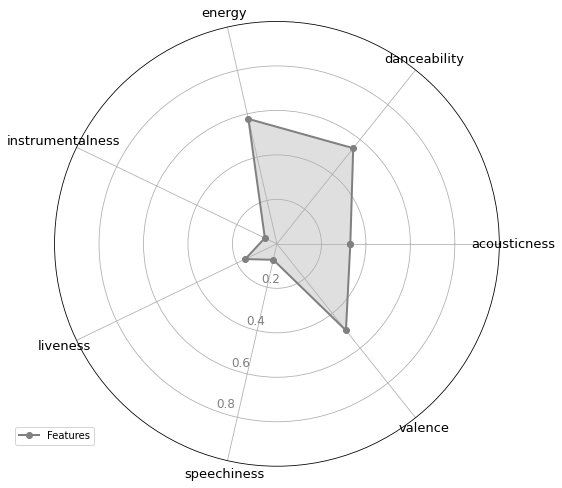

In [89]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt

labels= list(features)[:]
stats= features.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Features", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles[0:7] * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
